In [26]:
import pandas as pd
import dgl
import torch
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [7]:
nodes = pd.read_csv('./small_network/data/nodes.csv', index_col=0)
nodes.set_index('bank', inplace=True)
nodes.head()

,assets,liabilities,buffer,weights,original_stress,additional_stress,original_losses,additional_losses,additional_defaults
bank,,,,,,,,,
b1,0.374909,9.631713,5.628295,17.119551,0.007464,0.091307,5.628295,30.256686,3
b10,22.262280,0.995829,2.548139,26.945868,0.011748,0.004283,2.548139,1.159732,0
b100,0.260467,0.056702,5.022584,8.564855,0.003734,0.000189,5.022584,0.061172,0
b101,0.148554,4.966443,9.311341,15.981748,0.006968,0.110387,9.311341,25.097576,3
b102,6.483663,0.525904,6.496722,15.501686,0.006758,0.075514,6.496722,20.851029,2


In [ ]:
nodes.columns

Index(['assets', 'liabilities', 'buffer', 'weights', 'original_stress',
       'additional_stress', 'original_losses', 'additional_losses',
       'additional_defaults'],
      dtype='object')

In [55]:
node_attr = [
    'assets',
    'liabilities',
    'buffer',
    'weights',
]
nodes_features = nodes[node_attr]
nodes_features.head()

,assets,liabilities,buffer,weights
bank,,,,
b1,0.374909,9.631713,5.628295,17.119551
b10,22.262280,0.995829,2.548139,26.945868
b100,0.260467,0.056702,5.022584,8.564855
b101,0.148554,4.966443,9.311341,15.981748
b102,6.483663,0.525904,6.496722,15.501686


In [8]:
network = pd.read_csv('./small_network/data/network.csv', index_col=0)
network.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,...,b116,b117,b118,b119,b120,b121,b122,b123,b124,b125
b1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Plots

In [36]:
def plot_hist(s, name):
    plt.figure(figsize=(8, 6), dpi=100)
    sns.distplot(s)
    plt.title(name, fontsize=18)
    plt.xlabel(name, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

### Liabilities

c:\Users\vibal\PycharmProjects\systemic-risk-predictor\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


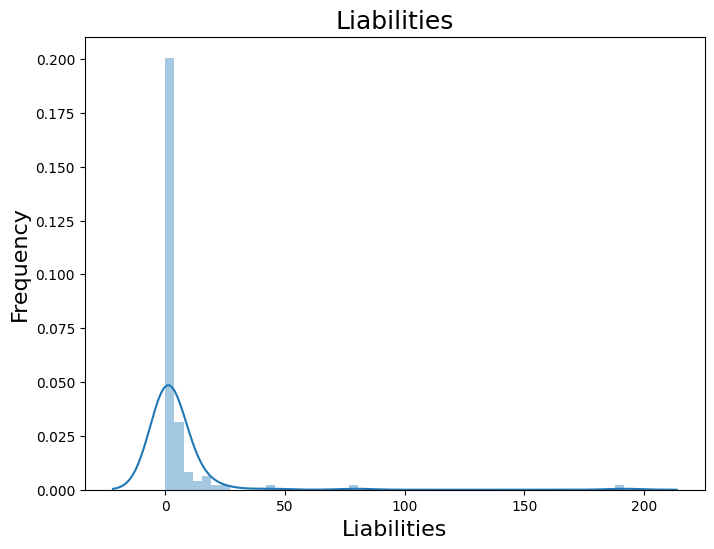

In [62]:
plot_hist(nodes['liabilities'], 'Liabilities')

### Liabilities > 1

c:\Users\vibal\PycharmProjects\systemic-risk-predictor\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


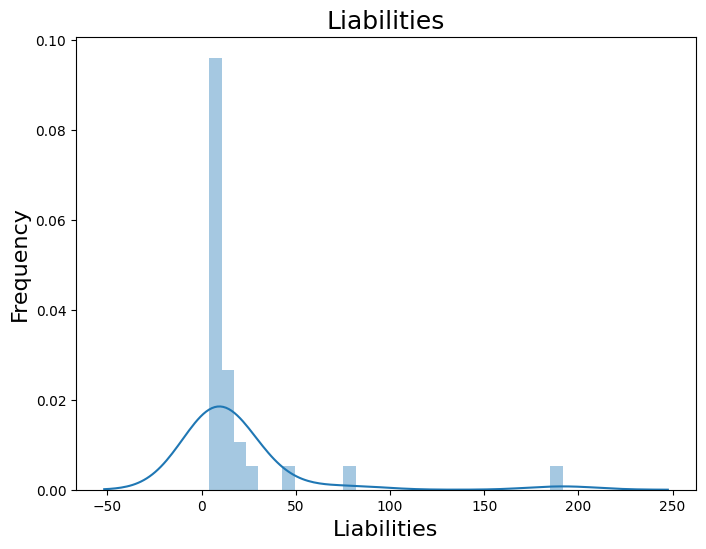

In [61]:
plot_hist(nodes['liabilities'][nodes['liabilities'] > 1], 'Liabilities')

### Weights

c:\Users\vibal\PycharmProjects\systemic-risk-predictor\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


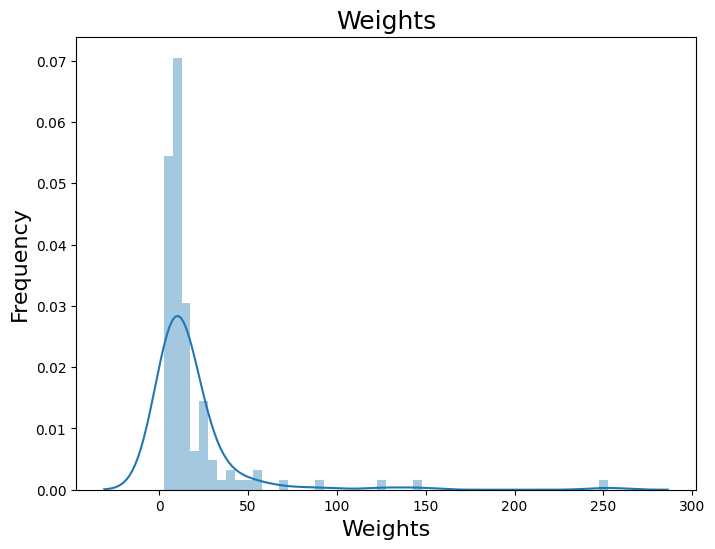

In [53]:
plot_hist(nodes['weights'], 'Weights')

### Correlations

In [58]:
corr = nodes.corr()
corr

,assets,liabilities,buffer,weights,original_stress,additional_stress,original_losses,additional_losses,additional_defaults
assets,1.000000,-0.008496,-0.050062,0.455492,0.455492,-0.038958,-0.050062,-0.010415,-0.014997
liabilities,-0.008496,1.000000,0.841430,0.872922,0.872922,0.672667,0.841430,0.943117,0.895663
buffer,-0.050062,0.841430,1.000000,0.791784,0.791784,0.622282,1.000000,0.814857,0.789095
weights,0.455492,0.872922,0.791784,1.000000,1.000000,0.578439,0.791784,0.824718,0.782851
original_stress,0.455492,0.872922,0.791784,1.000000,1.000000,0.578439,0.791784,0.824718,0.782851
additional_stress,-0.038958,0.672667,0.622282,0.578439,0.578439,1.000000,0.622282,0.873140,0.896896
original_losses,-0.050062,0.841430,1.000000,0.791784,0.791784,0.622282,1.000000,0.814857,0.789095
additional_losses,-0.010415,0.943117,0.814857,0.824718,0.824718,0.873140,0.814857,1.000000,0.972603
additional_defaults,-0.014997,0.895663,0.789095,0.782851,0.782851,0.896896,0.789095,0.972603,1.000000


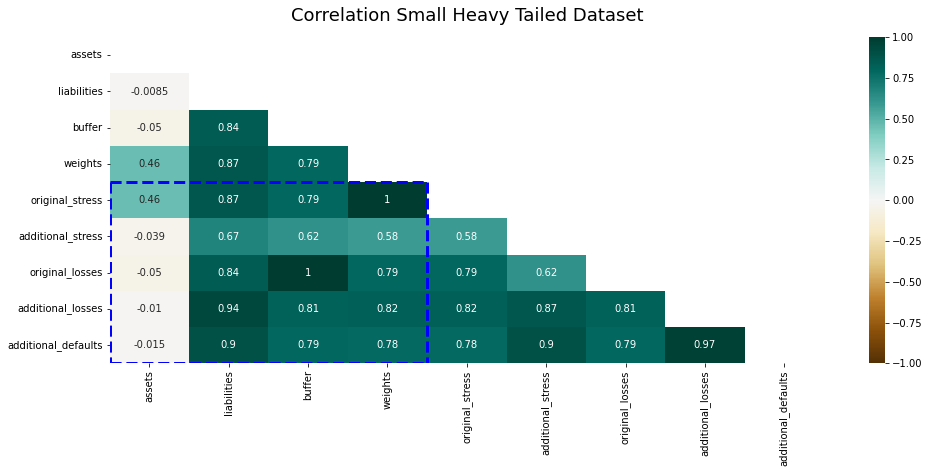

In [96]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Small Heavy Tailed Dataset', fontdict={'fontsize':18}, pad=16)
# add box lines
lines_style = dict(
    linestyles='dashed', 
    colors='blue', 
    linewidth=3,
)
heatmap.hlines([4, corr.shape[0]], xmin=0, xmax=4, **lines_style)
heatmap.vlines([0, 4], ymin=4, ymax=corr.shape[0], **lines_style)

## Get target

CrossEntropyLoss since we have more than 2 classes

In [4]:
TARGET_COLUMN = 'additional_stress'
QUANTILES = [0.75, 0.5, 0.25]

quant = nodes[TARGET_COLUMN].quantile(QUANTILES)
quant

0.75    0.076151
0.50    0.047829
0.25    0.014961
Name: additional_stress, dtype: float64

In [5]:
is_quant = pd.DataFrame()
free = np.ones(nodes.shape[0]).astype(bool)
for k,v in quant.iteritems():
    is_quant[k] = np.logical_and(nodes[TARGET_COLUMN] >= v, free)
    free = np.logical_and(free, np.logical_not(is_quant[k]))
is_quant[0.0] = free

is_quant

,0.75,0.50,0.25,0.00
bank,,,,
b1,True,False,False,False
b10,False,False,False,True
b100,False,False,False,True
b101,True,False,False,False
b102,False,True,False,False
...,...,...,...,...
b95,False,True,False,False
b96,False,False,True,False
b97,False,True,False,False


In [6]:
print(f"Length {is_quant.shape[0]}")
print(f"Number of True values {is_quant.sum().sum()}")

Length 125
Number of True values 125


In [7]:
is_quant_np = is_quant.to_numpy().astype(float)
is_quant_np.dtype

dtype('float64')

In [8]:
target_np = is_quant_np.argmax(1)
target_np

array([0, 3, 3, 0, 1, 3, 3, 3, 3, 2, 1, 2, 1, 0, 2, 2, 3, 0, 2, 1, 0, 2,
       2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 3, 3, 2, 0, 2, 3, 0, 1, 1, 0, 2, 0,
       0, 0, 0, 3, 2, 2, 3, 0, 0, 2, 3, 2, 2, 3, 3, 2, 1, 3, 1, 0, 0, 2,
       3, 2, 0, 1, 0, 3, 2, 1, 3, 3, 0, 2, 3, 3, 1, 2, 0, 1, 2, 3, 3, 0,
       3, 1, 1, 0, 1, 1, 3, 3, 3, 0, 0, 3, 1, 2, 3, 1, 0, 1, 2, 2, 0, 0,
       1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 1, 3, 2], dtype=int64)

In [9]:
is_quant = pd.DataFrame(data=target_np, index=is_quant.index, columns=['label'])
is_quant

,label
bank,
b1,0
b10,3
b100,3
b101,0
b102,1
...,...
b95,1
b96,2
b97,1


## Dataset

In [10]:
graph = nx.convert_matrix.from_pandas_adjacency(network, create_using=nx.DiGraph)
graph.edges[('b1', 'b55')]

{'weight': 0.37490927455228}

In order to group the features together we need to get a dictionary of {"bank":{"feat":values}}

In [13]:
{k:{"feat":torch.as_tensor(v, dtype=torch.float)} for k,v in nodes_features.T.to_dict('list').items()}['b10']

{'feat': tensor([22.2623,  0.9958])}

In [14]:
nx.set_node_attributes(graph, {k:{"feat":torch.as_tensor(v, dtype=torch.float)} for k,v in nodes_features.T.to_dict('list').items()})
graph.nodes(True)['b10']

{'feat': tensor([22.2623,  0.9958])}

Add target to graph

In [15]:
is_quant.to_dict('index')['b10']

{'label': 3}

In [16]:
nx.set_node_attributes(graph, is_quant.to_dict('index'))
graph.nodes(True)['b10']

{'feat': tensor([22.2623,  0.9958]), 'label': 3}

### Create dgl graph

In [17]:
print(f"Graph with {graph.number_of_nodes()} nodes")
print(f"Graph with {graph.number_of_edges()} edges")

Graph with 125 nodes
Graph with 249 edges


In [18]:
graph_dgl = dgl.from_networkx(graph,node_attrs=['feat', 'label'],edge_attrs=['weight'])
graph_dgl

Graph(num_nodes=125, num_edges=249,
      ndata_schemes={'feat': Scheme(shape=(2,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float32)})

### Dataset class

https://docs.dgl.ai/en/0.6.x/api/python/dgl.data.html

The basic DGL dataset for creating graph datasets. This class defines a basic template class for DGL Dataset. The following steps will are executed automatically:

1. Check whether there is a dataset cache on disk (already processed and stored on the disk) by invoking has_cache(). If true, goto 5.
2. Call download() to download the data.
3. Call process() to process the data.
4. Call save() to save the processed dataset on disk and goto 6.
5. Call load() to load the processed dataset from disk.
6. Done.

In [19]:
class ContagionDataset(dgl.data.DGLDataset):
    def __init__(self, sets_lengths=(0.8,0.1,0.1)):
        super().__init__(name='sistemic_risk', verbose=True)
        self.sets_lengths = sets_lengths

    def process(self):
        # graph with nodes and edges features
        self.graph = graph_dgl

        # for each graph in list: in this case only one
        # create train, validation and test masks
        n_nodes = self.graph.num_nodes()
        n_train, n_val = (int(n_nodes * k) for k in self.sets_lengths[:2])
        train_mask, val_mask, test_mask = [torch.zeros(n_nodes, dtype=torch.bool) for k in range(3)]
        train_mask[:n_train] = True
        val_mask[n_train:n_train+n_val] = True
        test_mask[n_train+n_val:] = True

        # shuffle
        idx = torch.randperm(n_nodes)
        train_mask, val_mask[idx], test_mask[idx] = train_mask[idx], val_mask[idx], test_mask[idx]

        # set mask in nodes
        self.graph.ndata['train_mask'] = train_mask
        self.graph.ndata['val_mask'] = val_mask
        self.graph.ndata['test_mask'] = test_mask

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self,i):
        return self.graphs[i]
    

### Try DropEdge

In [20]:
import copy
np.random.seed(123)

In [21]:
k = copy.deepcopy(graph_dgl)
k

Graph(num_nodes=125, num_edges=249,
      ndata_schemes={'feat': Scheme(shape=(2,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float32)})

In [22]:
remove_eids = np.random.randint(k.num_edges(), size=20)
remove_eids

array([109, 126,  66, 220,  98, 230,  17,  83, 106, 123,  57, 214, 225,
        96, 113, 126,  47,  73,  32, 174])

In [23]:
k.remove_edges(remove_eids)
k

Graph(num_nodes=125, num_edges=230,
      ndata_schemes={'feat': Scheme(shape=(2,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float32)})

In [24]:
graph_dgl

Graph(num_nodes=125, num_edges=249,
      ndata_schemes={'feat': Scheme(shape=(2,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float32)})